In [33]:
import pandas as pd
import otf2
from otf2.events import *


from plotnine import ggplot, geom_segment, aes, stat_smooth, facet_wrap, theme_bw, geom_point, geom_rect

In [70]:



def read_trace(trace_name="/home/friese/workspace/melissa-da/profiling/STATS/scorep_melissa_server_O_sum/traces.otf2"):
    with otf2.reader.open(trace_name) as trace:
        
        print("Read {} string definitions".format(len(trace.definitions.strings)))

        #for string in trace.definitions.strings:
        #    print("String definition with value '{}' in trace.".format(string))
        for location, event in trace.events:
            if isinstance(event, Enter):
                print("Encountered enter event into '{event.region.name}' on location {location} at {event.time}".format(location, event))
            elif isinstance(event, Leave):
                print("Encountered leave event for '{event.region.name}' on location {location} at {event.time}".format(location, event))
            else:
                print("Encountered event on location {} at {}".format(location, event.time))

#read_trace()

In [5]:

df = pd.DataFrame(columns=['thread', 'start_time', 'end_time', 'region_name'])

trace_name="/home/friese/workspace/melissa-da/profiling/STATS/scorep_melissa_server_O_sum/traces.otf2"
trace_name = "/home/friese/workspace/melissa-da/profiling/STATS/melissa_server_scorep/traces.otf2"
with otf2.reader.open(trace_name) as trace:

    print("Read {} string definitions".format(len(trace.definitions.strings)))

    #for string in trace.definitions.strings:
    #    print("String definition with value '{}' in trace.".format(string))
    open_events = []
    for location, event in trace.events:
        if isinstance(event, Enter):           
            #print(event.time)
            #print(event.region.name)
            #print("Encountered enter event into {} on location {} at {}".format(event.region.name, location, event.time))
            open_events.append((location.group.name, event.region.name, event.time))
            
        elif isinstance(event, Leave):
            #print("Encountered leave event for '{}' on location {} at {}".format(event.region.name, location, event.time))
            index = len(open_events)-1            
            while index >= 0 and open_events[index][0] != location.group.name and open_events[index][1] != event.region.name:
                index -= 1
            if index < 0:
                print("Warn: Did not find corresponding enter event for Encountered leave event for '{}' on location {} at {}".format(event.region.name, location.group.name, event.time))
            else:
                start_time = open_events[index][2]
                df = df.append({"thread": location.group.name, "start_time": start_time, "end_time": event.time, "region_name": event.region.name}, ignore_index=True)
                del open_events[index]
            
                
        else:
            pass
            #print("Encountered event on location {} at {}".format(location, event.time))




Read 493 string definitions
Warn: Did not find corresponding enter event for Encountered leave event for 'void check_schedule_new_tasks()' on location MPI Rank 1 at 21418019228854
Warn: Did not find corresponding enter event for Encountered leave event for 'void check_schedule_new_tasks()' on location MPI Rank 1 at 21418027096073
Warn: Did not find corresponding enter event for Encountered leave event for 'void check_schedule_new_tasks()' on location MPI Rank 1 at 21418086178306
Warn: Did not find corresponding enter event for Encountered leave event for 'void check_schedule_new_tasks()' on location MPI Rank 1 at 21418089610446
Warn: Did not find corresponding enter event for Encountered leave event for 'void check_schedule_new_tasks()' on location MPI Rank 1 at 21418100995306
Warn: Did not find corresponding enter event for Encountered leave event for 'MPI_Iprobe' on location MPI Rank 1 at 21418108996759
Warn: Did not find corresponding enter event for Encountered leave event for 'voi

In [3]:
open_events

[('MPI Rank 0', 'int main(int, char**)', 21416470642120),
 ('MPI Rank 0', 'void MpiManager::init()', 21416470650859),
 ('MPI Rank 0', 'void check_kill_requests()', 21418019204524),
 ('MPI Rank 0',
  'bool check_finished(std::shared_ptr<Assimilator>)',
  21418019226882),
 ('MPI Rank 0',
  'ompi_communicator_t* const& MpiManager::comm()',
  21418019228686)]

In [6]:
df

# for index, row in df.iterrows():
#     print(row['region_name'])
#     if not 'MPI' in row['region_name']:
#         print(row)

,thread,start_time,end_time,region_name
0,MPI Rank 0,21416470545261,21416470621249,MpiManager::MpiManager()
1,MPI Rank 0,21416470644796,21416470647088,void check_data_types()
2,MPI Rank 1,21416475882839,21416475934301,MpiManager::MpiManager()
3,MPI Rank 1,21416475948107,21416475949108,void check_data_types()
4,MPI Rank 0,21416475954427,21416890215850,MPI_Init
...,...,...,...,...
24820,MPI Rank 0,21418323509803,21418323573918,MPI_Finalize
24821,MPI Rank 0,21418319782626,21418323579415,void MpiManager::finalize()
24822,MPI Rank 1,21418319793284,21418323580732,void MpiManager::finalize()
24823,MPI Rank 0,21418315756804,21418323592636,"int main(int, char**)"


In [79]:
df

,thread,start_time,end_time,region_name
0,MPI Rank 0,7009674277528,7010008146145,MPI_Init
1,MPI Rank 1,7009654799108,7010008147383,MPI_Init
2,MPI Rank 1,7010008187899,7010008194351,MPI_Comm_size
3,MPI Rank 1,7010008198285,7010008199377,MPI_Comm_rank
4,MPI Rank 0,7010008227602,7010008231394,MPI_Comm_size
...,...,...,...,...
4214,MPI Rank 1,7011843117109,7011843120925,MPI_Recv
4215,MPI Rank 1,7011843142396,7011843149118,MPI_Barrier
4216,MPI Rank 0,7011843125396,7011843152421,MPI_Barrier
4217,MPI Rank 1,7011846369727,7011846399415,MPI_Finalize


In [2]:
df_a = pd.read_csv('a.csv', header=None, names=["rank","start","stop","?","region_name"])


In [43]:
df_a
df_a = df_a.sort_values(by='start')
df_a

,rank,start,stop,?,region_name
0,0,0.000000,0.000028,0,MpiManager::MpiManager()
24837,0,0.000036,0.683277,0,int main(int
1,0,0.000037,0.000038,1,void check_data_types()
11,0,0.000039,0.154756,1,void MpiManager::init()
4,0,0.000040,0.154746,2,MPI_Init
...,...,...,...,...,...
24832,0,0.682555,0.682594,1,LauncherConnection::~LauncherConnection()
24831,0,0.682557,0.682581,2,send_message_stop
24830,0,0.682558,0.682560,3,message_stop
24835,0,0.683247,0.683273,1,void MpiManager::finalize()


/home/friese/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


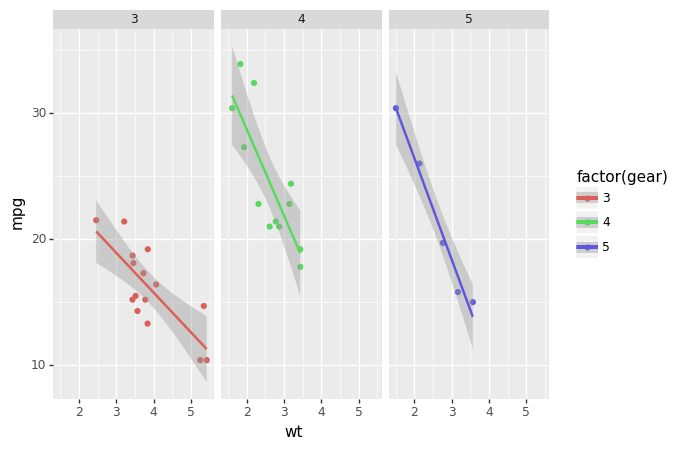

<ggplot: (-9223363281134601142)>

In [1]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(ggplot(df_a, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

In [20]:


(ggplot(df_a, aes(x='start', xend='stop', y='factor(rank)',
                     yend='factor(rank)', color='region_name')+geom_segment(size=4)))



PlotnineError: "Cannot add layer to object of type <class 'plotnine.aes.aes'>"

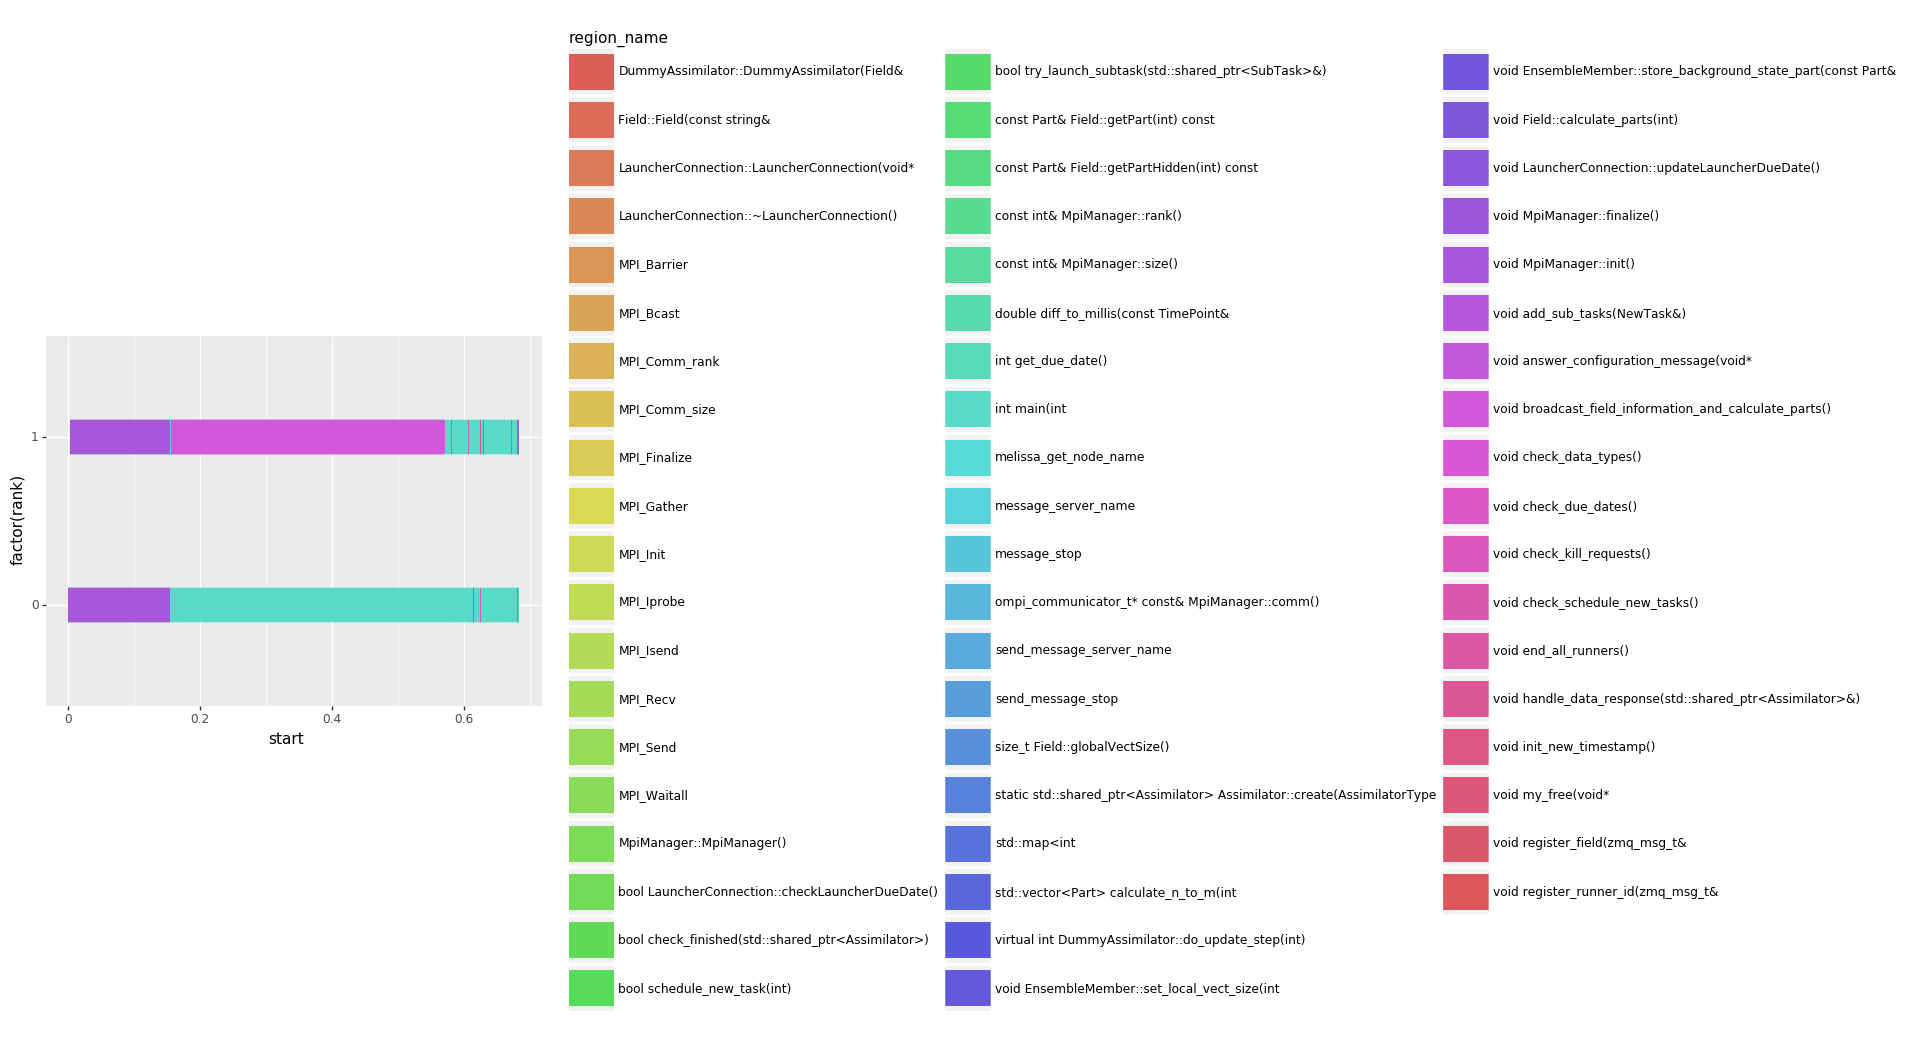

<ggplot: (8753675259186)>

In [47]:


(ggplot(df_a, aes(x='start', xend='stop', y='factor(rank)', yend='factor(rank)', color='region_name')) + geom_segment(size=14))

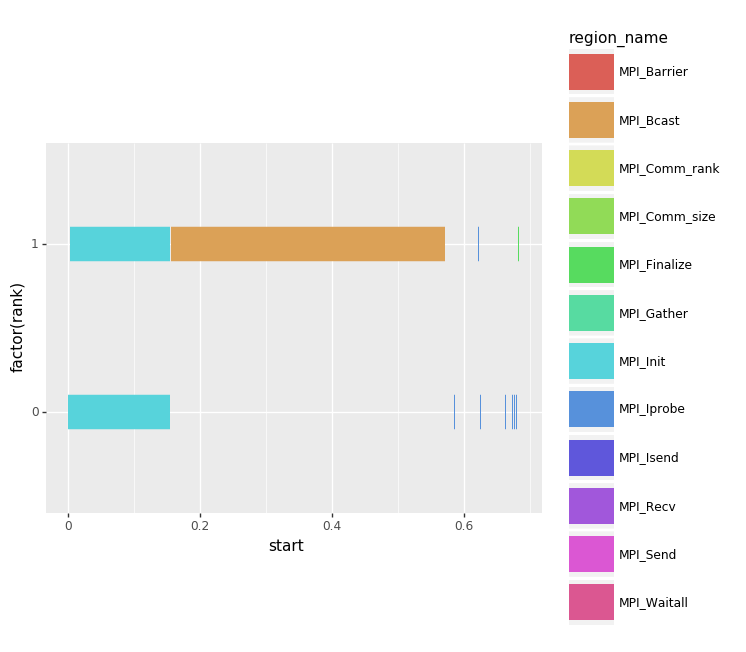

<ggplot: (-9223363283178474187)>

In [54]:
# plot only mpi functions:
df_mpi = df_a[df_a['region_name'].str.contains("MPI")]
(ggplot(df_mpi, aes(x='start', xend='stop', y='factor(rank)', yend='factor(rank)', color='region_name')) + geom_segment(size=14))

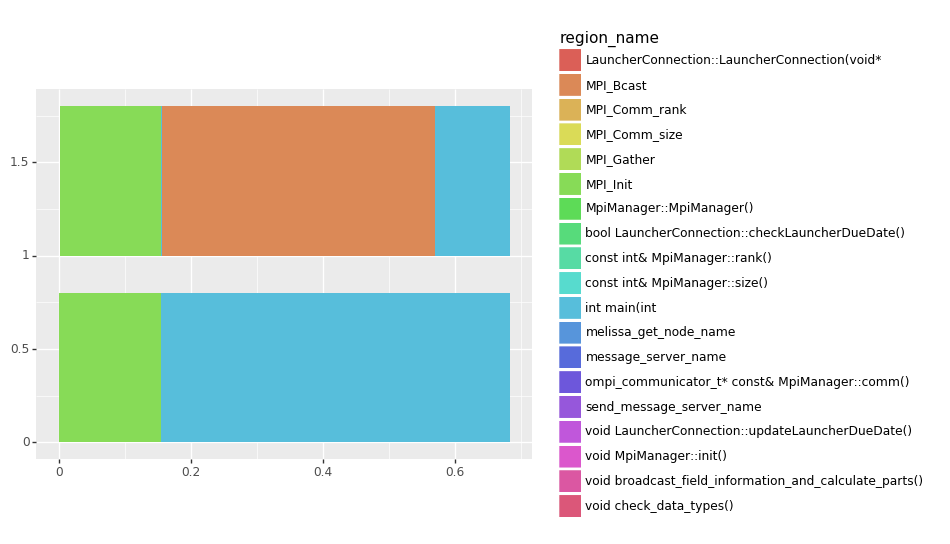

<ggplot: (8753675925056)>

In [55]:
(ggplot(df_a[0:300], 
        aes(xmin='start', xmax='stop', ymin='rank', ymax='rank+0.8', fill='region_name'))
 + geom_rect())

In [39]:
df_a[50:60]

,rank,start,stop,?,region_name
50,0,0.157344,0.157344,1,bool LauncherConnection::checkLauncherDueDate()
51,0,0.157413,0.157413,1,bool LauncherConnection::checkLauncherDueDate()
52,0,0.157482,0.157483,1,bool LauncherConnection::checkLauncherDueDate()
53,0,0.157551,0.157552,1,bool LauncherConnection::checkLauncherDueDate()
54,0,0.157621,0.157621,1,bool LauncherConnection::checkLauncherDueDate()
55,0,0.157690,0.157690,1,bool LauncherConnection::checkLauncherDueDate()
56,0,0.157759,0.157759,1,bool LauncherConnection::checkLauncherDueDate()
57,0,0.157828,0.157828,1,bool LauncherConnection::checkLauncherDueDate()
58,0,0.157897,0.157897,1,bool LauncherConnection::checkLauncherDueDate()
59,0,0.157966,0.157967,1,bool LauncherConnection::checkLauncherDueDate()
